In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [138]:
glass = pd.read_csv('../info/glass.csv')
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [139]:
glass = glass.drop('Id', axis=1)

In [140]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [141]:
X = glass.drop('Type', axis=1)
y = glass['Type']

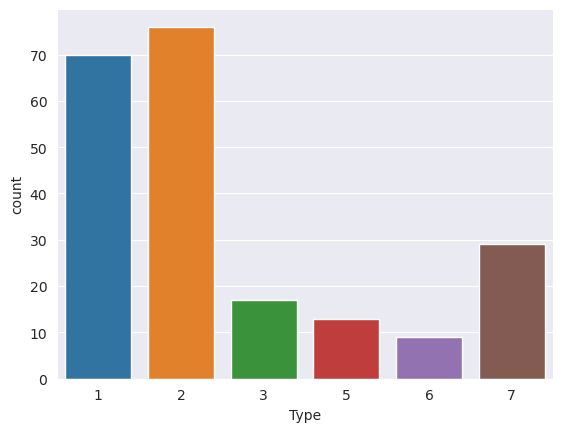

In [142]:
sns.countplot(data=glass, x='Type')
plt.savefig('report_pictures/Type.png')

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

scores = {'euclidean': [], 'chebyshev': [], 'manhattan': []}


def run_model(n_neighbors, metric):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    model.fit(scaled_X_train, y_train)
    preds = model.predict(scaled_X_test)
    #print(classification_report(y_test, preds, zero_division=1))
    
    scores[metric].append(accuracy_score(y_test, preds))
    
    #ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Paired')
    return model

In [145]:
k = range(1, 25)
metrics = ['euclidean', 'chebyshev', 'manhattan']
for n in k:
    for j in metrics:
        #print(f"Neighbors = {n}, Metric = {j}")
        run_model(n_neighbors=n, metric=j)

In [146]:
pd.DataFrame(scores)

,euclidean,chebyshev,manhattan
0,0.767442,0.697674,0.790698
1,0.697674,0.697674,0.674419
2,0.813953,0.744186,0.767442
3,0.720930,0.720930,0.767442
4,0.697674,0.651163,0.790698
5,0.651163,0.604651,0.697674
6,0.720930,0.627907,0.720930
7,0.697674,0.627907,0.697674
8,0.674419,0.604651,0.697674
9,0.627907,0.604651,0.697674


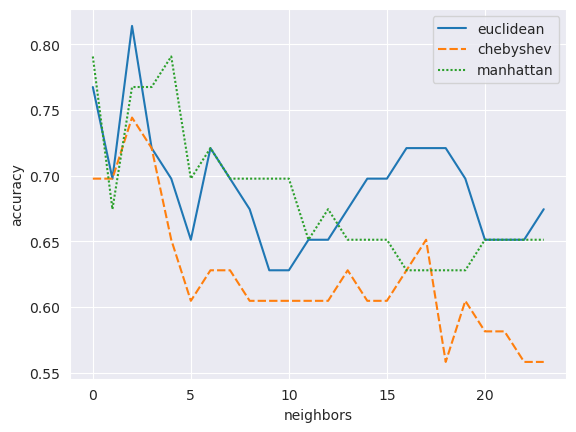

In [147]:
sns.lineplot(pd.DataFrame(scores))
plt.xlabel('neighbors')
plt.ylabel('accuracy');
plt.savefig('report_pictures/lineplot.png')

In [148]:
new_elem = pd.DataFrame.from_dict([{'RI': 1.516, 'Na': 11.7, 'Mg': 1.01, 'Al': 1.19, 'Si': 72.59, 'K': 0.43, 'Ca': 11.44, 'Ba': 0.02, 'Fe': 0.1}])
new_elem = scaler.transform(new_elem)

In [149]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [150]:
model = run_model(n_neighbors=3, metric='euclidean')
model.predict(new_elem)[0], model.predict_proba(new_elem)

(5, array([[0., 0., 0., 1., 0., 0.]]))

In [151]:
errs = []
accs = []
for k in range(1, 25):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    errs.append(1 - accuracy_score(y_test, model.predict(scaled_X_test)))
    accs.append(accuracy_score(y_test, model.predict(scaled_X_test)))

In [152]:
print(*zip(errs, accs))

(0.2325581395348837, 0.7674418604651163) (0.3023255813953488, 0.6976744186046512) (0.18604651162790697, 0.813953488372093) (0.2790697674418605, 0.7209302325581395) (0.3023255813953488, 0.6976744186046512) (0.34883720930232553, 0.6511627906976745) (0.2790697674418605, 0.7209302325581395) (0.3023255813953488, 0.6976744186046512) (0.32558139534883723, 0.6744186046511628) (0.37209302325581395, 0.627906976744186) (0.37209302325581395, 0.627906976744186) (0.34883720930232553, 0.6511627906976745) (0.34883720930232553, 0.6511627906976745) (0.32558139534883723, 0.6744186046511628) (0.3023255813953488, 0.6976744186046512) (0.3023255813953488, 0.6976744186046512) (0.2790697674418605, 0.7209302325581395) (0.2790697674418605, 0.7209302325581395) (0.2790697674418605, 0.7209302325581395) (0.3023255813953488, 0.6976744186046512) (0.34883720930232553, 0.6511627906976745) (0.34883720930232553, 0.6511627906976745) (0.34883720930232553, 0.6511627906976745) (0.32558139534883723, 0.6744186046511628)


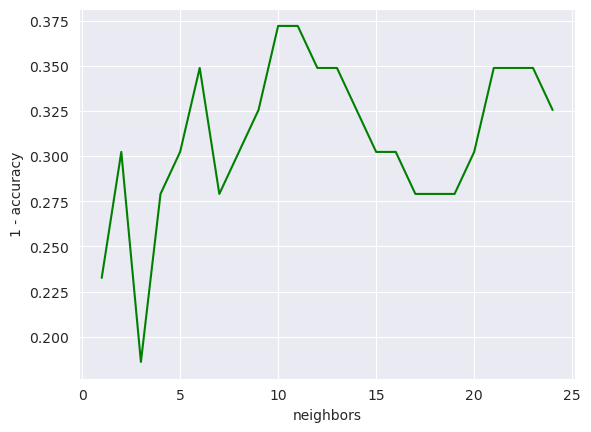

In [155]:
plt.plot(range(1, 25), errs, color='green')
#plt.plot(range(1, 25), accs, color='red')
plt.xlabel('neighbors')
plt.ylabel('1 - accuracy')
plt.savefig('report_pictures/errors.png');

0.813953488372093


<Figure size 640x480 with 0 Axes>

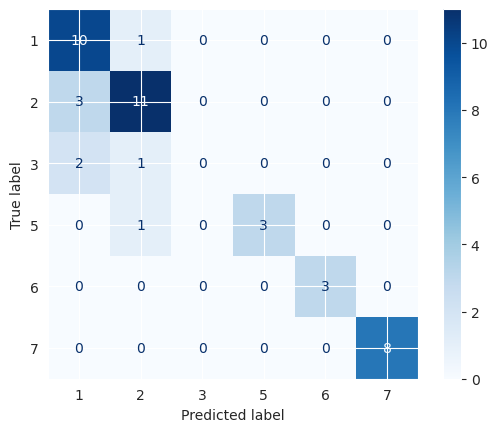

In [154]:
plt.savefig('report_pictures/errors.png')
model = KNeighborsClassifier(n_neighbors=3)
model.fit(scaled_X_train, y_train)
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test, cmap='Blues')
print(accuracy_score(y_test, model.predict(scaled_X_test)))